In [1]:
import math
import matplotlib.pyplot as plt
#import random
#import pprint
import torch
from torch import nn

ModuleNotFoundError: No module named 'torch'

In [ ]:
# Create a list of sets of N random numbers for training data
domain = 8
N = 2 # N elements in later array
inputs = torch.FloatTensor(10000, N).uniform_((-1*domain),domain)
outputs = inputs

def makeTrainingData():
    # Create a list of sets of N random numbers for training data
    domain = 25
    N = 2 # N elements in later array
    inputs = torch.FloatTensor(10000, N).uniform_((-1*domain),domain)
    outputs = inputs**2

    # Print input and output tensor training data
    print("Inputs:")
    print(inputs)
    print("Outputs:")
    print(outputs)


Inputs:
tensor([[ 7.6077,  4.8572],
        [ 6.2838,  6.0058],
        [-5.3425,  6.1312],
        ...,
        [-4.8164,  7.7415],
        [ 0.9748,  6.0716],
        [ 7.1076, -1.3976]])
Outputs:
tensor([[ 440.3088,  114.5911],
        [ 248.1199,  216.6312],
        [-152.4915,  230.4789],
        ...,
        [-111.7324,  463.9479],
        [   0.9262,  223.8223],
        [ 359.0576,   -2.7300]])


In [ ]:
# Create the neural network
hidden_nodes = 500
model = torch.nn.Sequential(
   torch.nn.Linear(inputs.shape[1],hidden_nodes),
    torch.nn.ReLU(),
    #torch.nn.Linear(hidden_nodes,hidden_nodes),
    #torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes,outputs.shape[1])
)
def makeModel():
    # Create the neural network
    hidden_nodes = 500
    model = torch.nn.Sequential(
        torch.nn.Linear(inputs.shape[1],hidden_nodes),
        torch.nn.ReLU(),
        #torch.nn.Linear(hidden_nodes,hidden_nodes),
        #torch.nn.ReLU(),
        torch.nn.Linear(hidden_nodes,outputs.shape[1])
    )

In [ ]:
def trainModel():
    # Get ready to train
    model.train()

    # Break the list up into smaller batches for more efficient training
    numMiniBatch = int(math.floor(inputs.shape[0]/100.))
    inputMiniBatches = inputs.chunk(numMiniBatch)
    outputMiniBatches = outputs.chunk(numMiniBatch)

    # Train the neural network
    lossFunc = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

    n_epochs = 500
    print("Training...")
    print("_" * 50)
    for epoch in range(n_epochs):
    # Print something every 10 epochs of training
        if epoch%10 == 0:
            #print('=>Starting {}/{} epochs.'.format(epoch+1,n_epochs))
            print('.', end='')
        # Train the model
        for minibatch in range(numMiniBatch):
            prediction = model(inputMiniBatches[minibatch])
            loss = lossFunc(prediction,outputMiniBatches[minibatch])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Save model
    torch.save(model.state_dict(), 'model_weights.pth')
    print()
    print("Training done!")


In [ ]:
def plotResults():
    model.load_state_dict(torch.load('model_weights.pth'))

    model.eval()

    realX = [ ]
    realY = [ ]
    modelY = [ ]

    incrmSize = 1/100

    for i in range((-100*domain), (100*domain), 1):
        x = model(torch.tensor([i*incrmSize, (i+1)*incrmSize])) #N elements here
        modelY.append(x[0].tolist())
        #modelY.append(x[1].tolist())
        realX.append(i*incrmSize)
        realY.append((i*incrmSize)**3)

    # Plot results   
    plt.plot(realX, modelY)
    plt.plot(realX, realY)

Create the Model

The model can be trained multiple times for more accurate results.

Inputs:
tensor([[-14.3069,  10.5696],
        [-20.4211,  -1.8305],
        [ 19.5763,  20.9499],
        ...,
        [ 18.3154, -23.4816],
        [ 21.2948,  21.3984],
        [ -7.9155,  21.9700]])
Outputs:
tensor([[204.6867, 111.7156],
        [417.0193,   3.3506],
        [383.2296, 438.9002],
        ...,
        [335.4527, 551.3832],
        [453.4701, 457.8900],
        [ 62.6545, 482.6819]])
Training...
__________________________________________________
..................................................
Training done!


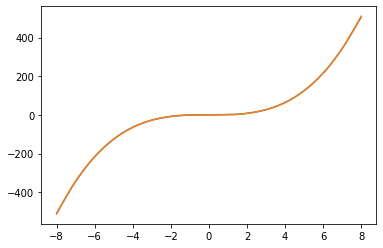

In [ ]:
makeTrainingData(10, 3)
trainModel()
plotResults()

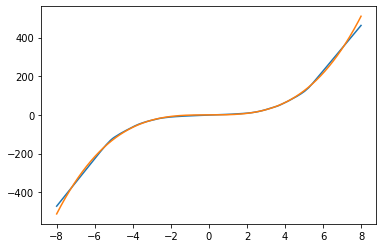

In [ ]:
plotResults()

by next week: try gpu and caml